@Author: Bhupinder Singh

@Date: 20-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 20-01-2023

@Title: Hierarchical Clustering Second problem


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
import sklearn.cluster as cluster
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

### Import the dataset 

In [2]:
data = pd.read_csv('USCensus1990.csv')

### Getting Insights of dataset

In [3]:
data.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [4]:
data.describe()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,...,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06
mean,1.239142e+06,3.851643e+00,3.299006e+00,1.574252e+00,1.207488e-01,2.880964e-01,1.236083e+00,1.394556e+00,1.432078e+00,1.464860e+00,...,7.939100e-01,1.483541e+00,3.402331e-02,8.310208e-01,1.000718e+00,1.095047e+00,3.844509e-02,8.446546e+00,1.820591e+00,1.391918e-01
std,7.096459e+05,2.048492e+00,4.041179e+00,1.696150e+00,6.709576e-01,9.667118e-01,1.759400e+00,1.760919e+00,8.442641e-01,8.462626e-01,...,1.308956e+00,1.966293e+00,1.812891e-01,8.594720e-01,6.841873e-01,7.437089e-01,1.922683e-01,4.080579e+00,2.108889e+00,4.035386e-01
min,1.000000e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.245710e+05,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
50%,1.239142e+06,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00
75%,1.853713e+06,6.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,...,3.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.100000e+01,2.000000e+00,0.000000e+00
max,2.468284e+06,7.000000e+00,1.100000e+01,1.200000e+01,4.000000e+00,4.000000e+00,9.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,...,3.000000e+00,6.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.700000e+01,7.000000e+00,2.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 69 columns):
 #   Column     Dtype
---  ------     -----
 0   caseid     int64
 1   dAge       int64
 2   dAncstry1  int64
 3   dAncstry2  int64
 4   iAvail     int64
 5   iCitizen   int64
 6   iClass     int64
 7   dDepart    int64
 8   iDisabl1   int64
 9   iDisabl2   int64
 10  iEnglish   int64
 11  iFeb55     int64
 12  iFertil    int64
 13  dHispanic  int64
 14  dHour89    int64
 15  dHours     int64
 16  iImmigr    int64
 17  dIncome1   int64
 18  dIncome2   int64
 19  dIncome3   int64
 20  dIncome4   int64
 21  dIncome5   int64
 22  dIncome6   int64
 23  dIncome7   int64
 24  dIncome8   int64
 25  dIndustry  int64
 26  iKorean    int64
 27  iLang1     int64
 28  iLooking   int64
 29  iMarital   int64
 30  iMay75880  int64
 31  iMeans     int64
 32  iMilitary  int64
 33  iMobility  int64
 34  iMobillim  int64
 35  dOccup     int64
 36  iOthrserv  int64
 37  iPerscare  int64
 38  dP

### Checking for Null values in data set

In [6]:
data.isnull().sum()

caseid       0
dAge         0
dAncstry1    0
dAncstry2    0
iAvail       0
            ..
iWorklwk     0
iWWII        0
iYearsch     0
iYearwrk     0
dYrsserv     0
Length: 69, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 69 columns):
 #   Column     Dtype
---  ------     -----
 0   caseid     int64
 1   dAge       int64
 2   dAncstry1  int64
 3   dAncstry2  int64
 4   iAvail     int64
 5   iCitizen   int64
 6   iClass     int64
 7   dDepart    int64
 8   iDisabl1   int64
 9   iDisabl2   int64
 10  iEnglish   int64
 11  iFeb55     int64
 12  iFertil    int64
 13  dHispanic  int64
 14  dHour89    int64
 15  dHours     int64
 16  iImmigr    int64
 17  dIncome1   int64
 18  dIncome2   int64
 19  dIncome3   int64
 20  dIncome4   int64
 21  dIncome5   int64
 22  dIncome6   int64
 23  dIncome7   int64
 24  dIncome8   int64
 25  dIndustry  int64
 26  iKorean    int64
 27  iLang1     int64
 28  iLooking   int64
 29  iMarital   int64
 30  iMay75880  int64
 31  iMeans     int64
 32  iMilitary  int64
 33  iMobility  int64
 34  iMobillim  int64
 35  dOccup     int64
 36  iOthrserv  int64
 37  iPerscare  int64
 38  dP

In [8]:
data = data.drop(['caseid'], axis=1)

In [9]:
data = data.sample(n=10000)

### Checking for Outliers in data set

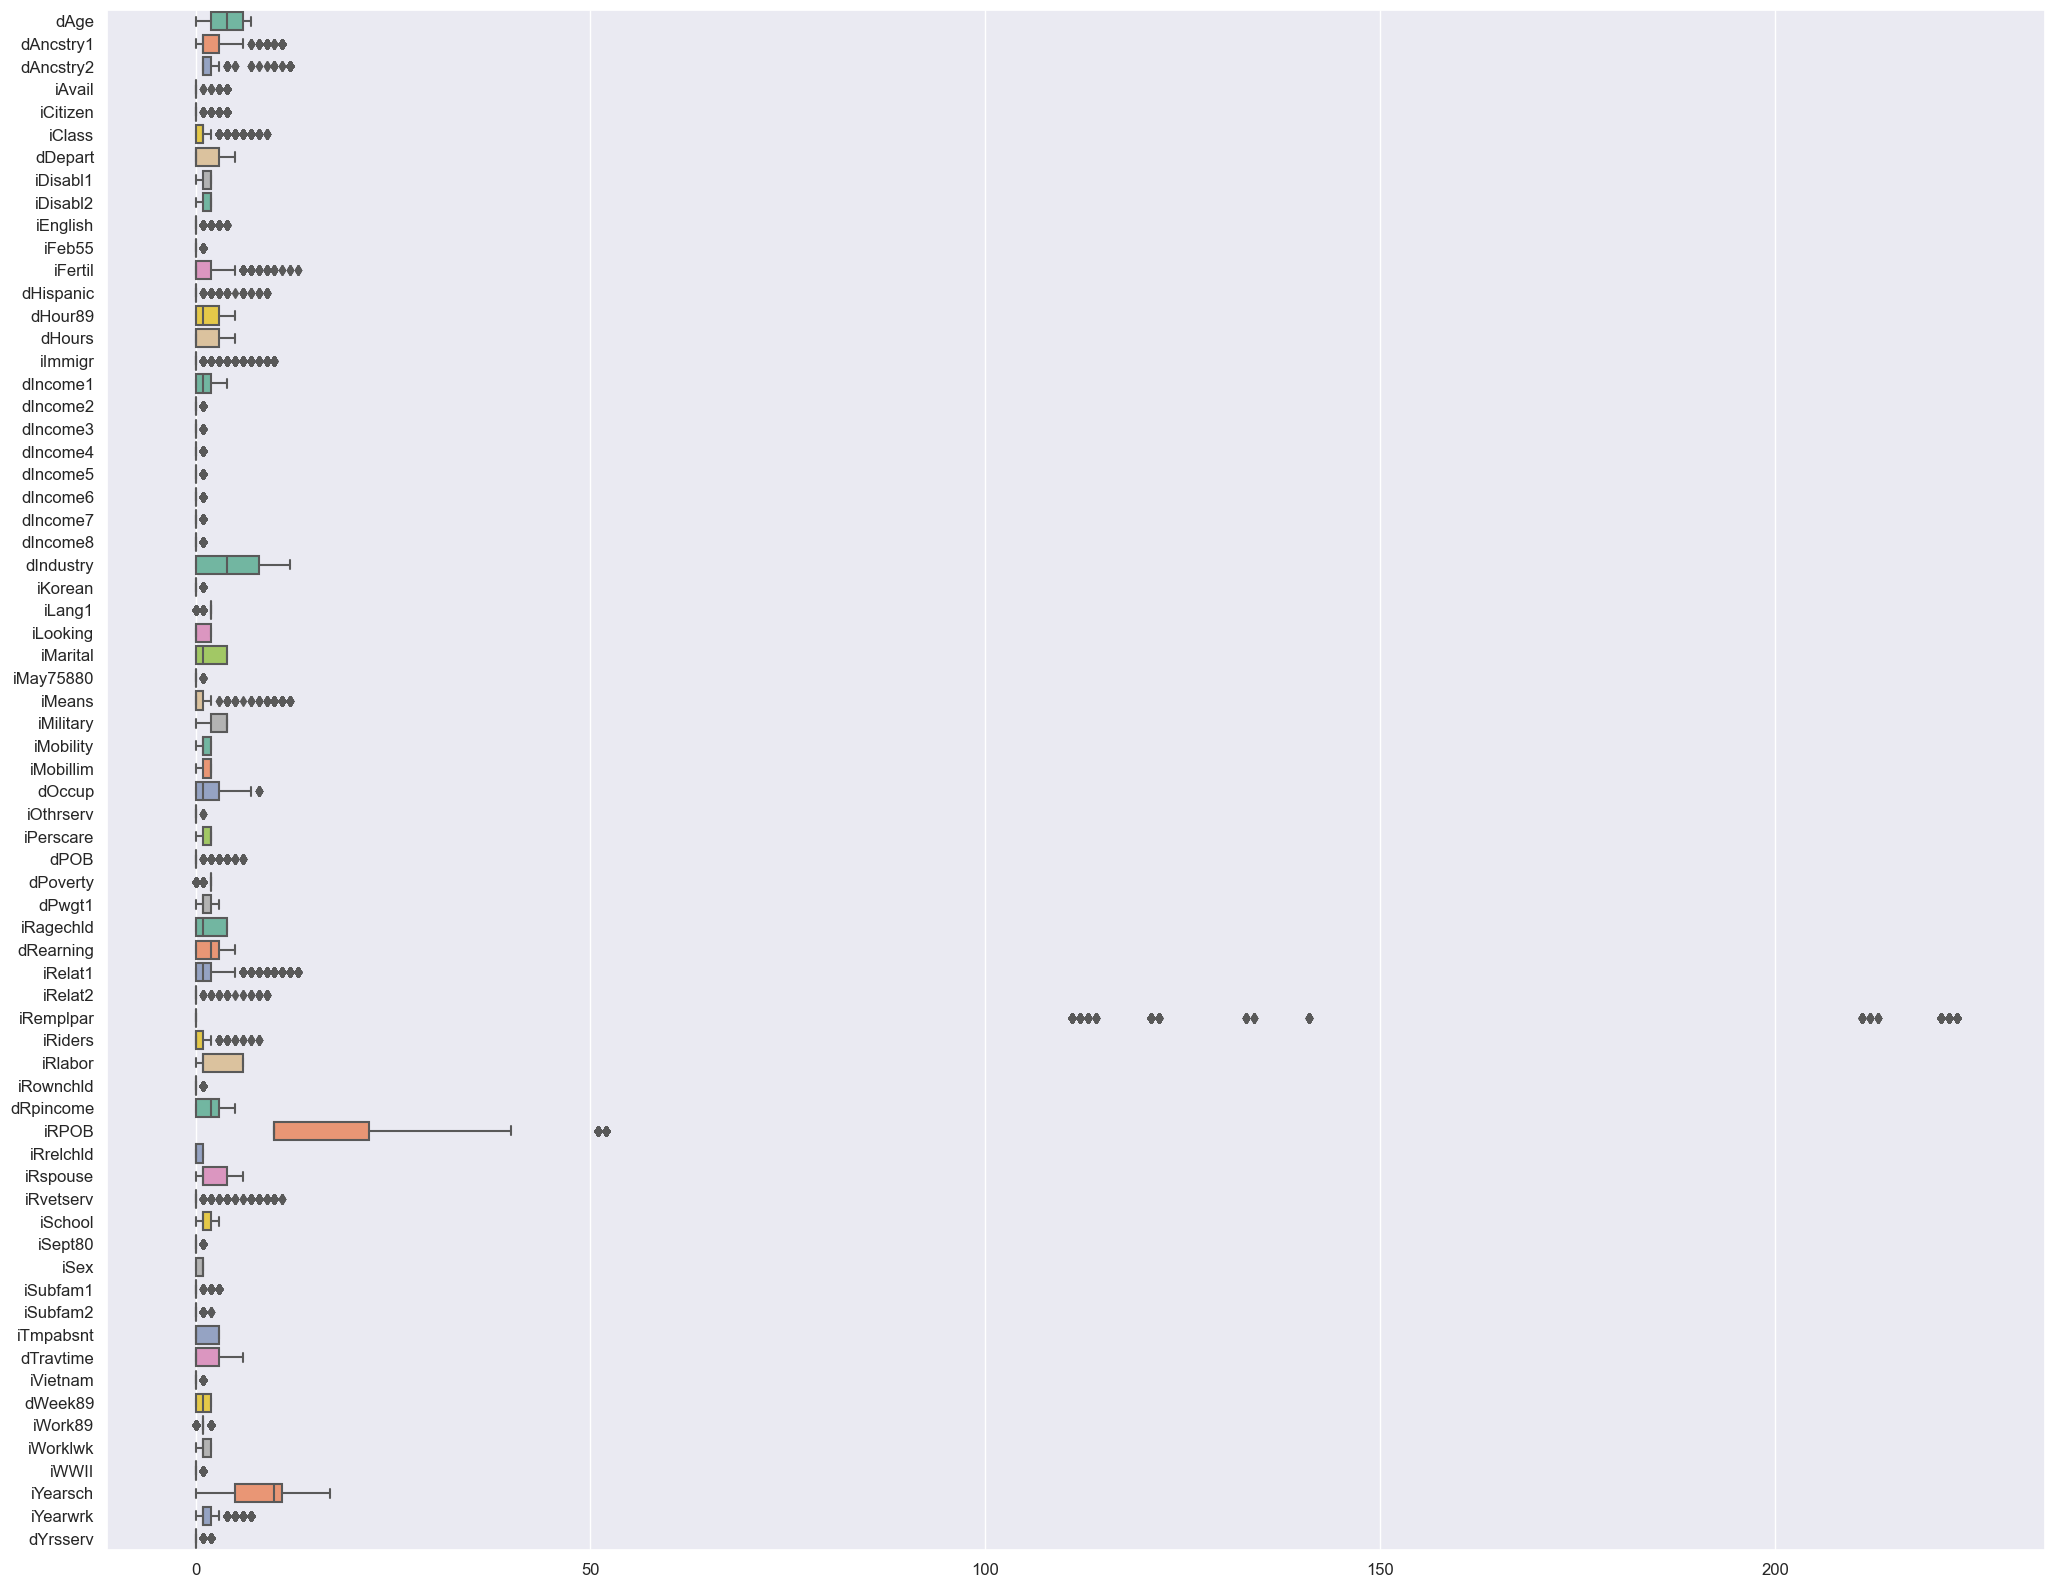

In [10]:
#create the plot
sns.set(rc={'figure.figsize':(25,20)})
ax = sns.boxplot(data , orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
#

### Removing Outliers

In [11]:
def cap_data(data):
    """
    Description:
            This function is used to remove outliers
    Parameter:
        data : Imported dataset
    Return:
            Returns the data without outliers
    """
    for col in data.columns:
            print("capping the ",col)
            if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
                percentiles = data[col].quantile([0.25,0.75]).values
                data[col][data[col] <= percentiles[0]] = percentiles[0]
                data[col][data[col] >= percentiles[1]] = percentiles[1]
            else:
                data[col]=data[col]
    return data

data=cap_data(data)

capping the  dAge
capping the  dAncstry1
capping the  dAncstry2
capping the  iAvail
capping the  iCitizen
capping the  iClass
capping the  dDepart
capping the  iDisabl1
capping the  iDisabl2
capping the  iEnglish
capping the  iFeb55
capping the  iFertil
capping the  dHispanic
capping the  dHour89
capping the  dHours
capping the  iImmigr
capping the  dIncome1
capping the  dIncome2
capping the  dIncome3
capping the  dIncome4
capping the  dIncome5
capping the  dIncome6
capping the  dIncome7
capping the  dIncome8
capping the  dIndustry
capping the  iKorean
capping the  iLang1
capping the  iLooking
capping the  iMarital
capping the  iMay75880
capping the  iMeans
capping the  iMilitary
capping the  iMobility
capping the  iMobillim
capping the  dOccup
capping the  iOthrserv
capping the  iPerscare
capping the  dPOB
capping the  dPoverty
capping the  dPwgt1
capping the  iRagechld
capping the  dRearning
capping the  iRelat1
capping the  iRelat2
capping the  iRemplpar
capping the  iRiders
capping

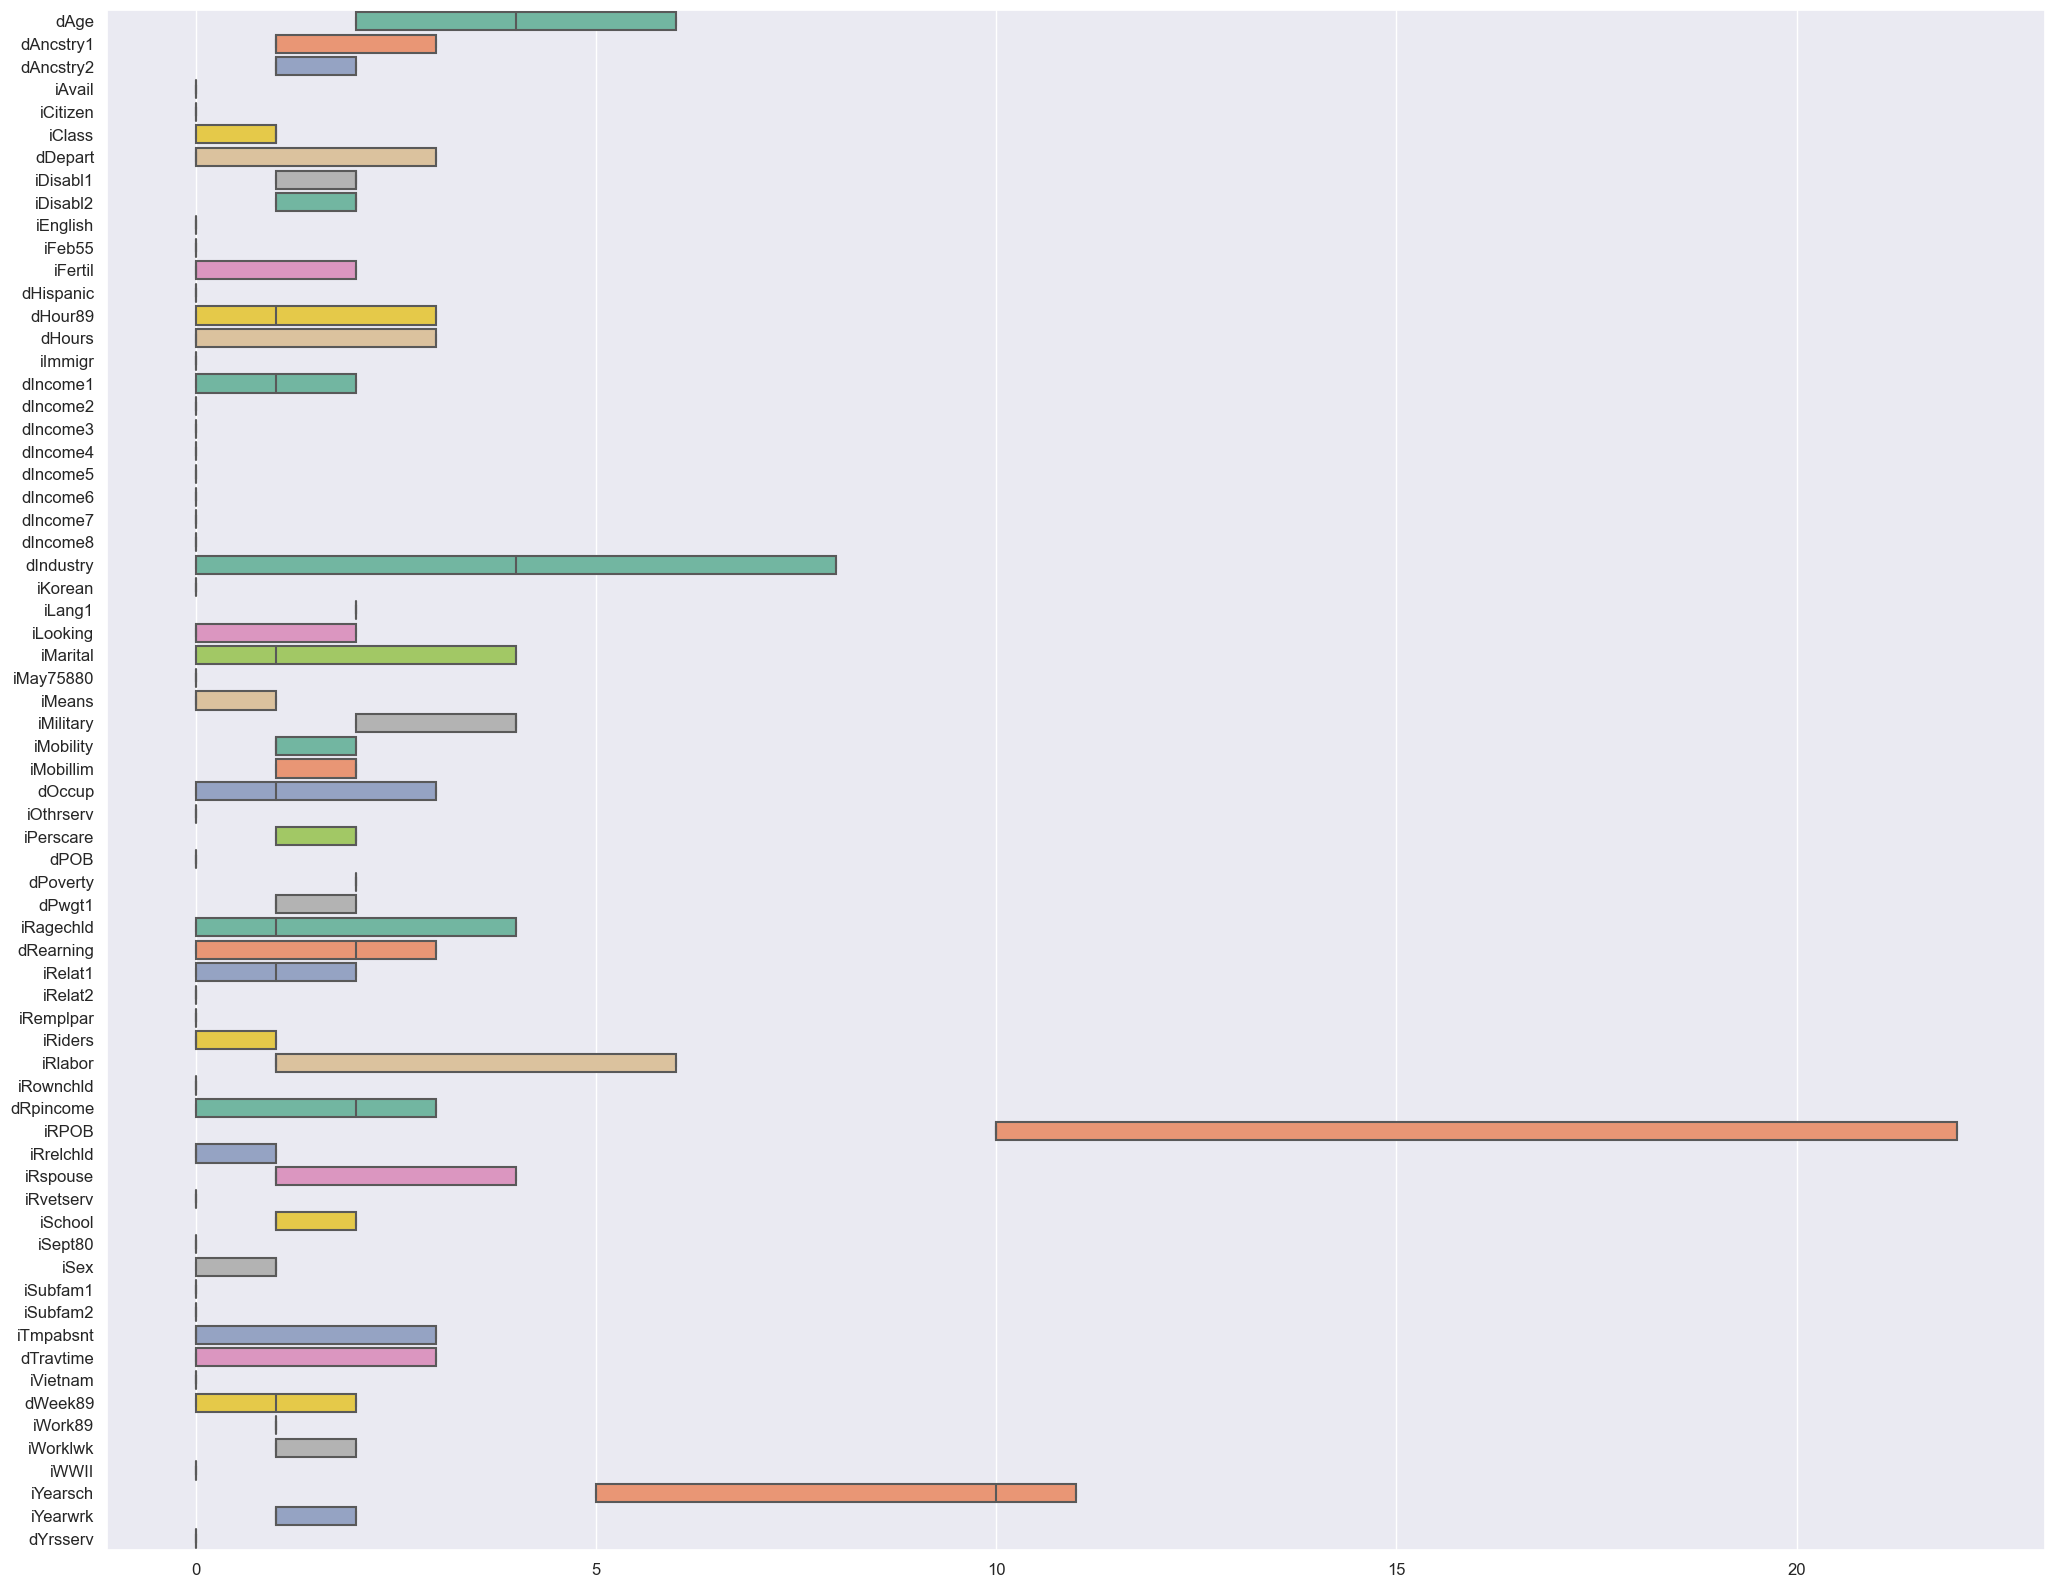

In [12]:
#create the plot
ax = sns.boxplot(data, orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Featue Scaling

In [13]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(data)
data = pd.DataFrame(standard_df)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.042139,-0.730826,1.509889,0.0,0.0,-1.208816,-0.846320,0.699431,0.650137,0.0,...,1.679972,-0.822086,0.0,-0.976523,0.0,1.421029,0.0,0.992969,1.603170,0.0
1,-0.590574,1.461541,-0.662300,0.0,0.0,0.827256,-0.846320,0.699431,0.650137,0.0,...,1.679972,-0.822086,0.0,0.194228,0.0,1.421029,0.0,0.600677,-0.623764,0.0
2,1.307565,0.365358,-0.662300,0.0,0.0,0.827256,-0.846320,-1.429734,-1.538139,0.0,...,-0.607779,-0.822086,0.0,-0.976523,0.0,1.421029,0.0,0.600677,1.603170,0.0
3,1.307565,-0.730826,-0.662300,0.0,0.0,0.827256,1.348113,0.699431,0.650137,0.0,...,-0.607779,-0.077915,0.0,1.364978,0.0,-0.703715,0.0,0.600677,-0.623764,0.0
4,0.674852,0.365358,-0.662300,0.0,0.0,0.827256,1.348113,0.699431,0.650137,0.0,...,-0.607779,0.666256,0.0,1.364978,0.0,-0.703715,0.0,0.600677,-0.623764,0.0


### Dimentionality Reduction using PCA

In [15]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,2.198186,4.602920
1,-0.178848,3.298108
2,1.441582,2.828134
3,-3.865494,-0.845137
4,-4.131336,-0.448356


### Finding Optimum number of Clusters in Hierarchical clustering

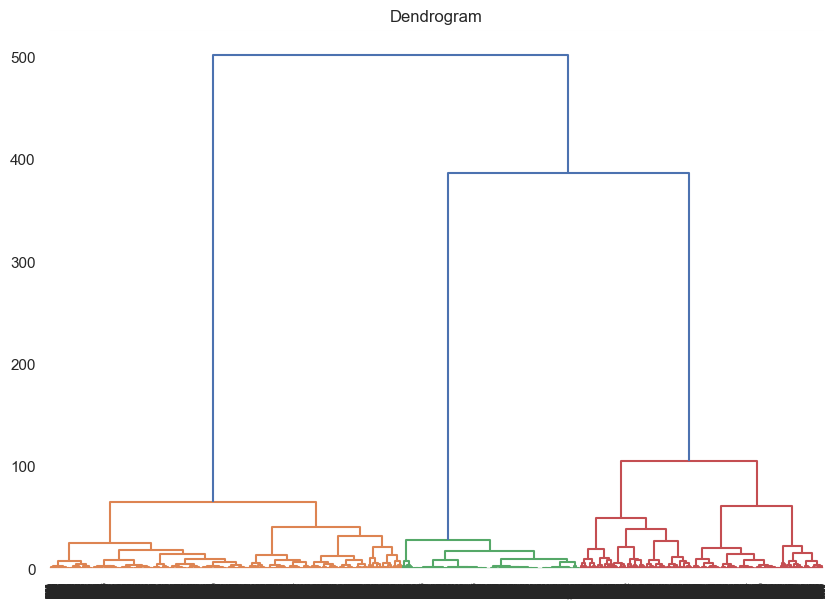

In [16]:
#Dendrogram plot
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(pca_df, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method)

In [17]:
cluster_ea = AgglomerativeClustering(n_clusters=3, linkage='ward',affinity='euclidean')

c:\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


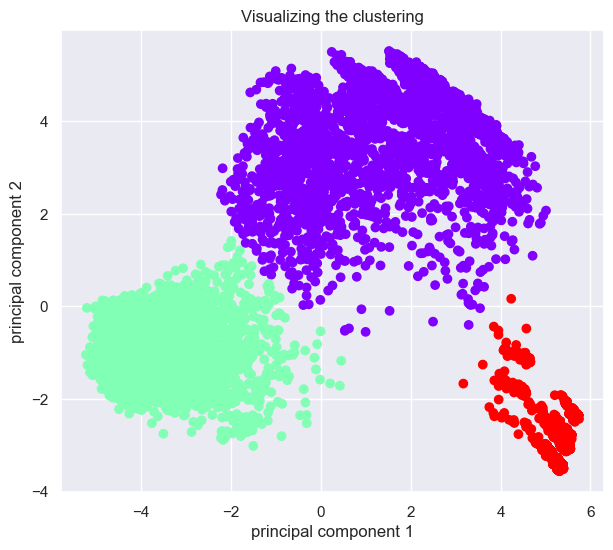

In [27]:
# Visualizing the clustering
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(pca_df['principal component 1'], pca_df['principal component 2'], c = cluster_ea.fit_predict(pca_df),cmap='rainbow')
ax.set_xlabel("principal component 1")
ax.set_ylabel("principal component 2")
ax.set_title("Visualizing the clustering")
plt.show()

Silhouette Score

In [19]:
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.592834858578898
Silhouette score for k(clusters) = 3 is 0.7691661802703336
Silhouette score for k(clusters) = 4 is 0.6960689590045861


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 5 is 0.5563419498807535
Silhouette score for k(clusters) = 6 is 0.5473593060684091


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 7 is 0.5358839784609944
Silhouette score for k(clusters) = 8 is 0.5173162690631493


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 9 is 0.5160355342739054
Silhouette score for k(clusters) = 10 is 0.48858426897878043


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 11 is 0.49013993586690063
